Task 2

Generating matrix(at this task we are using numpy and matplotlib)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generating matrix 20x20 with random bool values ( 0 and 1 ).
matrix = np.random.randint(0, 2, (20, 20))

print(matrix)

[[0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0]
 [1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0]
 [1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1]
 [1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0]
 [0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1]
 [1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1]
 [0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1]
 [1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0]
 [1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0]
 [1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1]
 [0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0]
 [0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0]
 [0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0]
 [0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1]
 [0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1]
 [1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0]
 [1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0]
 [0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1]
 [0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1]
 [1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0]]


Counting living neighbours

In [22]:
def count_neighbors(grid, x, y):
    """Counting living neighbours with decarte coordinates (x, y)."""
    neighbors = [
        (-1, -1), (-1, 0), (-1, 1),
        (0, -1),         (0, 1),
        (1, -1), (1, 0), (1, 1)
    ]
    count = 0
    for dx, dy in neighbors:
        nx, ny = x + dx, y + dy
        if 0 <= nx < 20 and 0 <= ny < 20:  # check if we are not going beyond the matrix
            count += grid[nx, ny]
    return count

Generating final matrix after final iterations

In [23]:
def generate_next_grid(grid):
    """Generating new matrix after step of game."""
    new_grid = np.zeros((20, 20), dtype=int)  # Creating new matrix
    
    for x in range(20):
        for y in range(20):
            live_neighbors = count_neighbors(grid, x, y)
            
            # Checking the game conditions
            if grid[x, y] == 1:  # Living cell
                if live_neighbors in [2, 3]:
                    new_grid[x, y] = 1  # Still alive
                else:
                    new_grid[x, y] = 0  # Dies
            else:  # Dead cell
                if live_neighbors == 3:
                    new_grid[x, y] = 1  # Revives
    
    return new_grid


Visualising result. Before final result, printing first and final matrix(to make it easier to see changes)

Initial Grid:
[[0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0]
 [1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0]
 [1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0]
 [0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1]
 [0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0]
 [1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0]
 [1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0]
 [0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0]
 [0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1]
 [0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0]
 [1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1]
 [1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0]
 [1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0]
 [1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1]
 [1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0]]

Final Grid After 20 Iterations:
[[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 

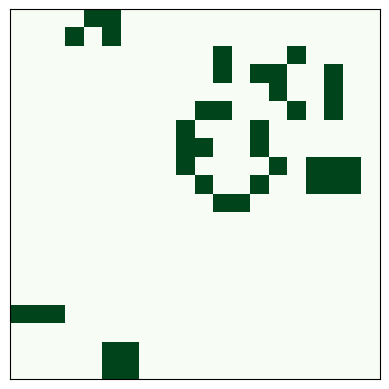

In [24]:
def visualize(grid):
    """Visualicing matrix with matplotlib."""
    plt.imshow(grid, cmap="Greens", interpolation="nearest")
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Starting matrix
initial_grid = np.random.randint(0, 2, (20, 20))

# Copying starting matrix, so we dont lose it
current_grid = initial_grid.copy()

# Doing 20 iteration of game
for _ in range(20):
    current_grid = generate_next_grid(current_grid)

# Printing result
print("Initial Grid:")
print(initial_grid)

print("\nFinal Grid After 20 Iterations:")
print(current_grid)

# Visualizing final matrix
visualize(current_grid)